In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import secondary_fyncions as sf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.drop(labels=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.Sex = data.Sex.map({'female':0, 'male':1})
data.Age.fillna(data.Age.median(), inplace=True)
data = sf.get_dummies(data, 'Embarked', 'Embarked')

In [3]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,1
2,1,1,0,38.0,1,0,71.2833,0,0
3,1,3,0,26.0,0,0,7.9250,0,1
4,1,1,0,35.0,1,0,53.1000,0,1
5,0,3,1,35.0,0,0,8.0500,0,1


In [4]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


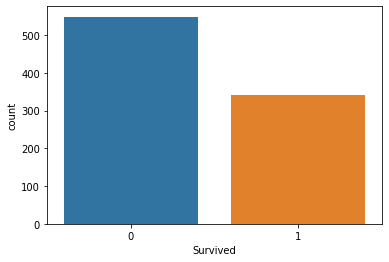

In [6]:
sns.countplot(x='Survived',data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f204c25ea90>,
      dtype=object)

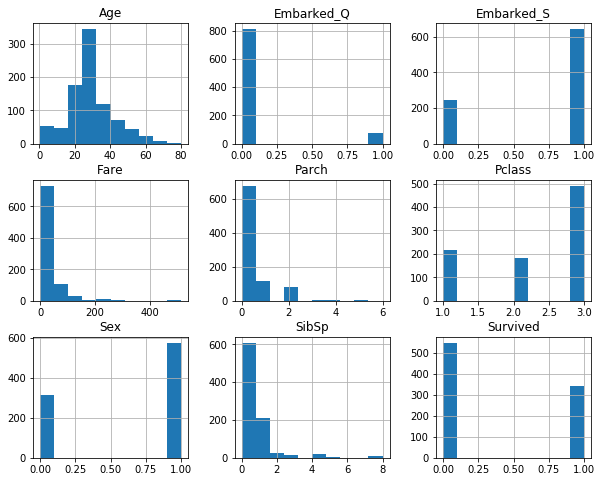

In [7]:
data.hist(figsize=(10,8))

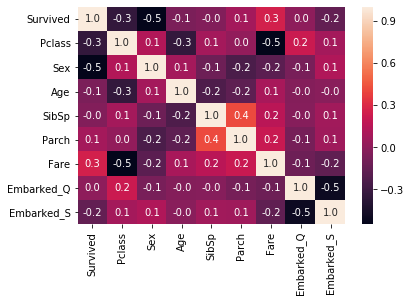

In [8]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')

/home/tay/ml-2019-08/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tay/ml-2019-08/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


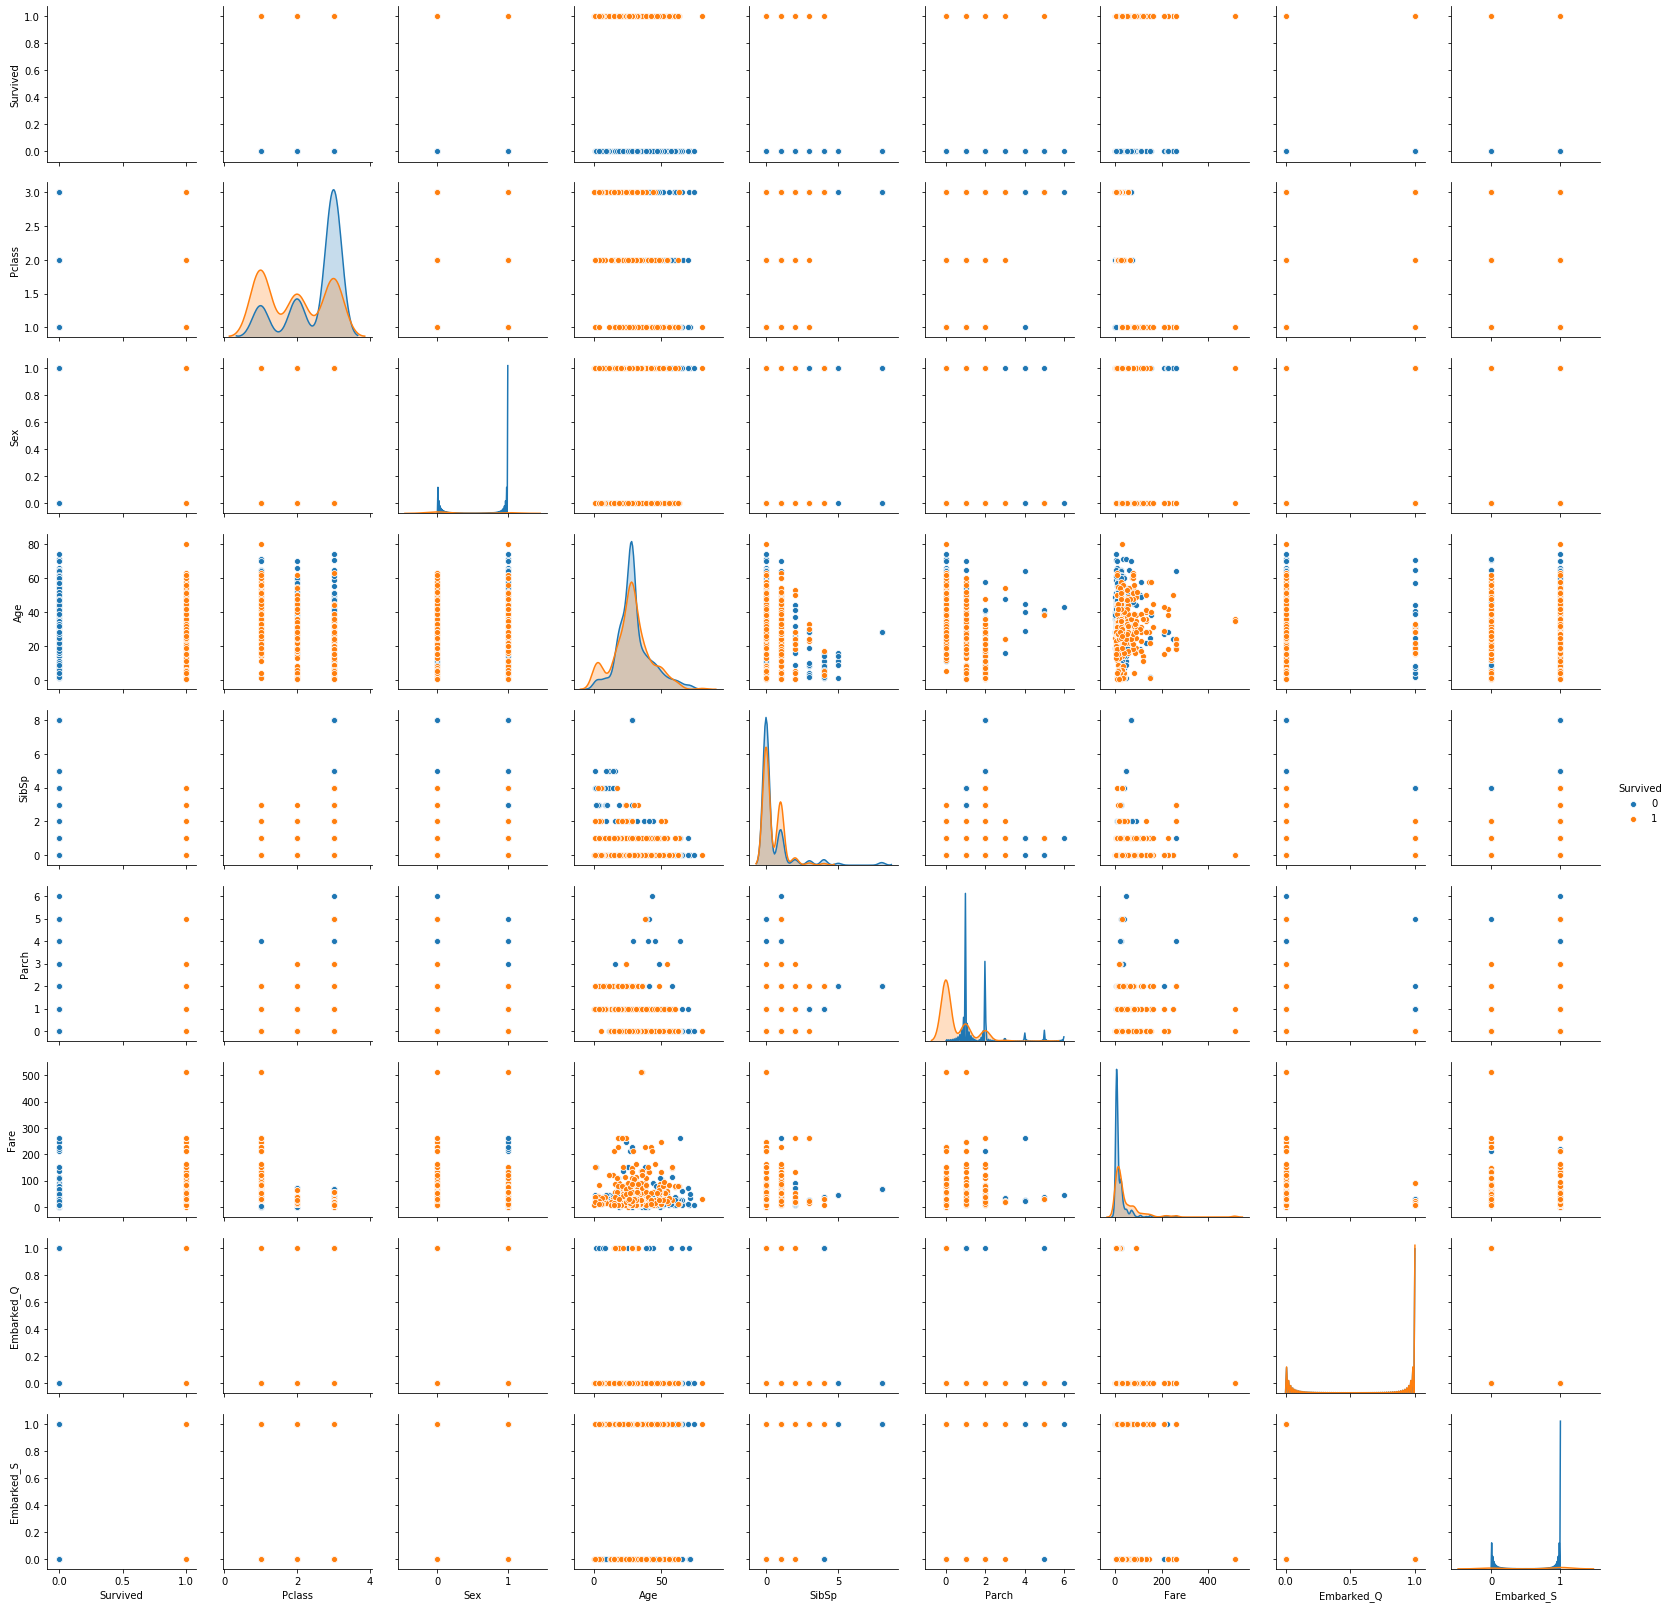

In [9]:
sns.pairplot(data, hue='Survived')

# Обучение модели RandomForestClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Survived'], axis=1),
    data['Survived'],
    test_size=0.3,
    stratify=data['Survived']
)

In [12]:
tree_params = {
    'n_estimators': np.arange(100, 500, 50),
    'max_leaf_nodes': np.arange(10, 50, 5)
}

rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    tree_params,
    verbose=True,
    n_jobs=-1,
    cv=5,
    scoring='roc_auc'
)

rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

# Качество получнной модели

In [13]:
sf.quality_report(rf.predict(X_train), y_train)

Accuracy: 0.894
Precision: 0.770
Recall: 0.944
f1_score: 0.848


In [14]:
sf.quality_report(rf.predict(X_test), y_test)

Accuracy: 0.806
Precision: 0.680
Recall: 0.787
f1_score: 0.729


/home/tay/ml-2019-08/11/secondary_fyncions.py:39: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  featureImportance["importance"].plot('bar');


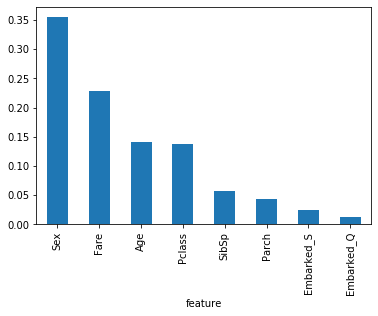

In [15]:
sf.plot_tree_feature_importance(rf, X_train.columns)

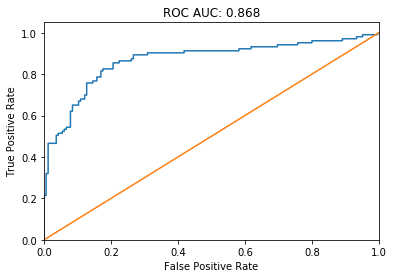

In [16]:
sf.plot_roc_curve(rf.predict_proba(X_test)[:,1], y_test)